In [1]:
# Imports
import pyinputplus as pyip
import matplotlib.pyplot as plt
import string
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
# Read in training dataset for modeling
train_filepath = 'https://raw.githubusercontent.com/neonshaman/C964/main/train.csv'
# x from train dataset features
x = pd.read_csv(train_filepath)
# y from train dataset output
y = x['SalePrice']

In [3]:
# Whitegrid style for better visual contrast
sns.set(style="whitegrid")

# Describe numeric features in train dataset
x.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


(array([ 16.,  74., 184., 345., 252., 199., 125.,  85.,  61.,  38.,  27.,
         15.,  14.,   8.,   6.,   2.,   1.,   1.,   2.,   1.,   2.,   0.,
          0.,   0.,   2.]),
 array([ 34900.,  63704.,  92508., 121312., 150116., 178920., 207724.,
        236528., 265332., 294136., 322940., 351744., 380548., 409352.,
        438156., 466960., 495764., 524568., 553372., 582176., 610980.,
        639784., 668588., 697392., 726196., 755000.]),
 <BarContainer object of 25 artists>)

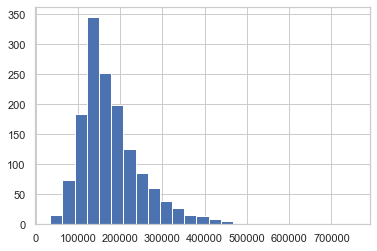

In [4]:
# Display train dataset distribution of sales prices
plt.hist(y, bins = 25)

(array([  5.,   0.,   2.,   7.,   8.,   7.,  47.,  48.,  86., 151., 217.,
        174., 186., 137., 118.,  87.,  64.,  49.,  24.,  22.,  11.,   2.,
          4.,   2.,   2.]),
 array([15.45442782, 15.61805472, 15.78168162, 15.94530851, 16.10893541,
        16.2725623 , 16.4361892 , 16.5998161 , 16.76344299, 16.92706989,
        17.09069678, 17.25432368, 17.41795058, 17.58157747, 17.74520437,
        17.90883126, 18.07245816, 18.23608505, 18.39971195, 18.56333885,
        18.72696574, 18.89059264, 19.05421953, 19.21784643, 19.38147333,
        19.54510022]),
 <BarContainer object of 25 artists>)

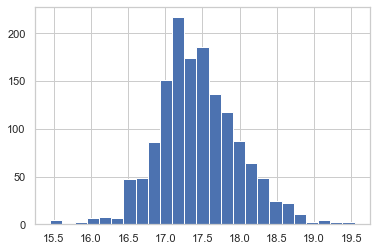

In [5]:
# Normalize train dataset distribution of sales prices
offset_log = 10000
plt.hist(np.log2(y + offset_log), bins = 25)

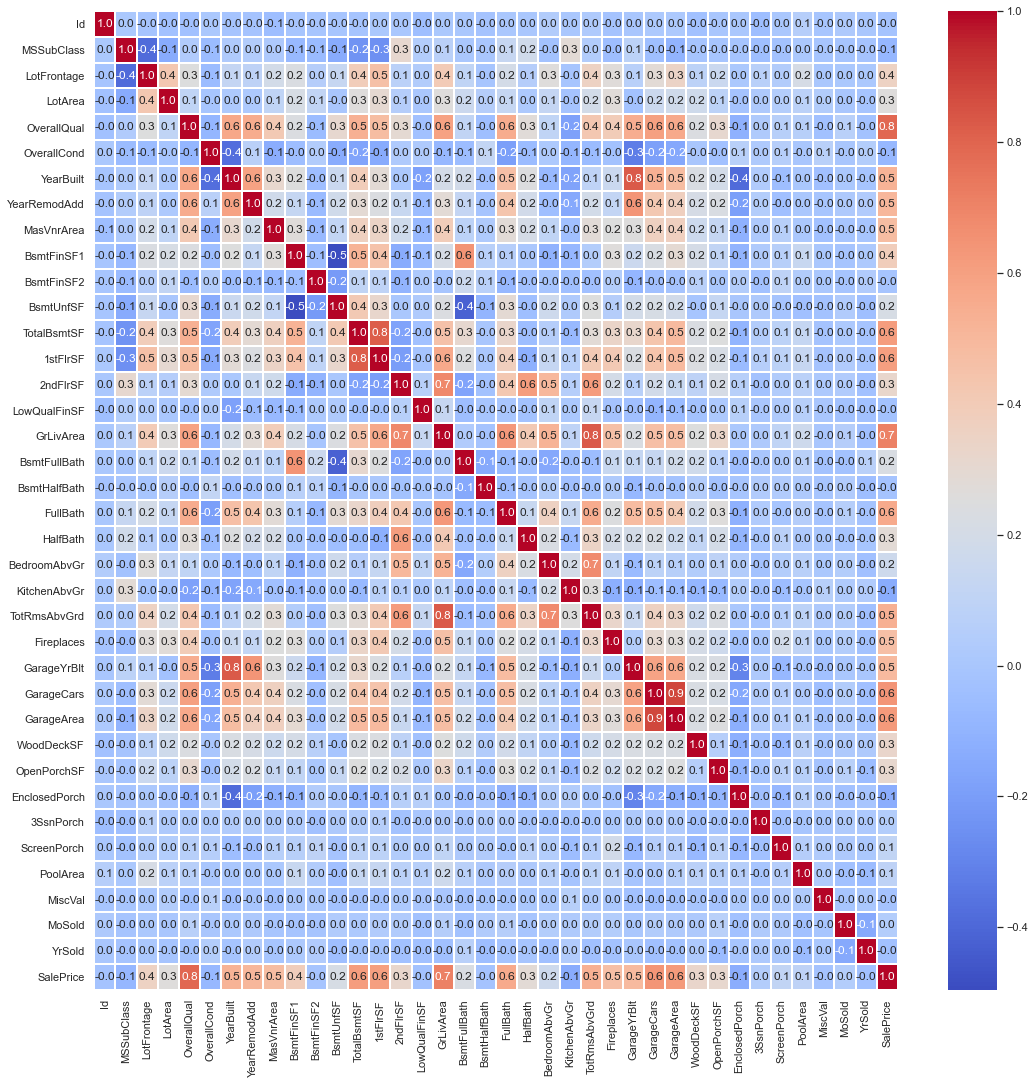

In [6]:
# Display heatmap of variable intercorrelations to aid in regressor selection for target variable
plt.figure(figsize = (18, 18))
train_corr = x.corr()
sns.heatmap(train_corr, cmap = "coolwarm", annot=True, fmt='.1f', linewidths = 0.05);

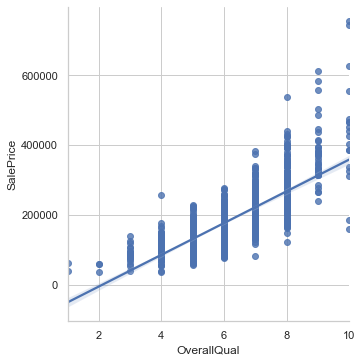

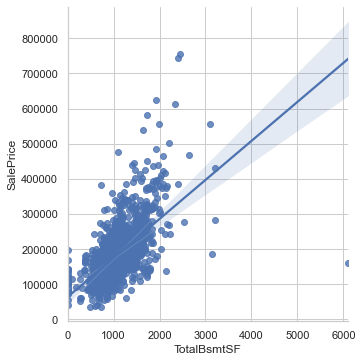

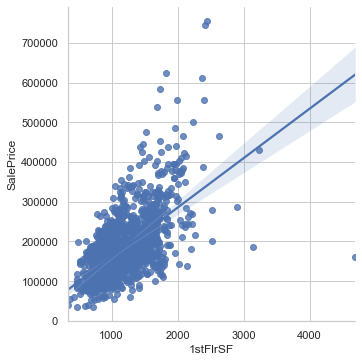

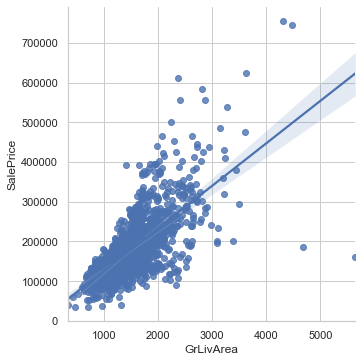

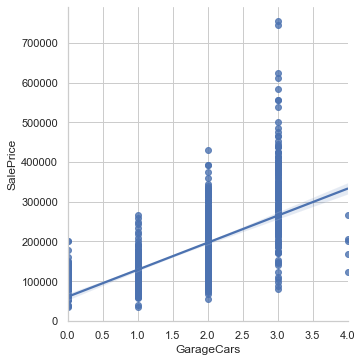

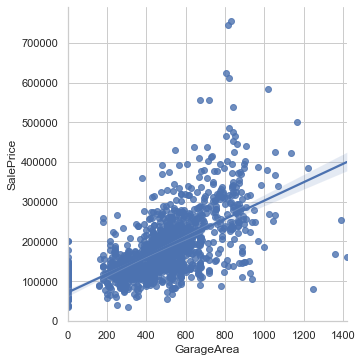

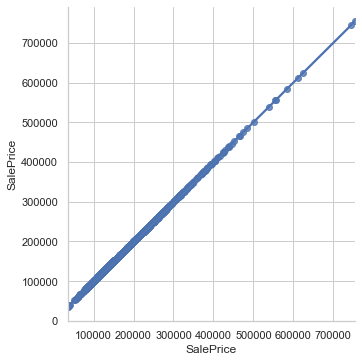

In [7]:
# From the above heatmap, we select a correlation of .60 with SalePrice as significant enough to warrant regression inclusion
sig_corr = train_corr.index[train_corr['SalePrice'] >= .6]
features = []
for reg in sig_corr:
    features.append(reg)
    
# Plot relation between features and SalePrice
for reg in features:
    sns.lmplot(x = reg, y = 'SalePrice', data = x)

In [8]:
# Drop outliers
x = x.drop(x['TotalBsmtSF'][x['TotalBsmtSF'] > 4000 ].index)
x = x.drop(x['1stFlrSF'][x['1stFlrSF'] > 4000 ].index)
x = x.drop(x['GrLivArea'][x['GrLivArea'] > 4000 ].index)
x = x.drop(x['GarageArea'][x['GarageArea'] > 1200 ].index)
# Update output
y = x['SalePrice']
# Significant regressors
sig_x = x[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']]
feat_labels = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']
# Split the data into testing and training
x_train, x_test, y_train, y_test = train_test_split(sig_x, y, test_size=0.5, random_state=0)
# Create random forest classifier
regressor = RandomForestRegressor(n_estimators=150, random_state=42)
# Clean NaN
x_train = np.nan_to_num(x_train)
y_train = np.nan_to_num(y_train)
# Train classifier
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [9]:
# Calculate_prediction takes in a series of widget harvested inputs and provides them for regression analysis, producing
# through regression analysis a real estate price prediction from the dataset 
def calculate_prediction(quality, total_basement_sqft, first_flr_sqft, above_grade_area, garage_cars, garage_area):
   # Predict with input
    predicted_price = regressor.predict([[
        quality.value, 
        total_basement_sqft.value, 
        first_flr_sqft.value, 
        above_grade_area.value, 
        garage_cars.value, 
        garage_area.value]])
    return predicted_price

In [17]:
# Widget sliders collect input and are passed to calculate_prediction function with button press
quality = widgets.IntSlider(min=0, max=10, step=1, description='Quality')
#display(quality)
total_basement_sqft = widgets.IntSlider(min=0, max=3000, step=1, description='Bsmnt Sqft')
#display(total_basement_sqft)
first_flr_sqft = widgets.IntSlider(min=0, max=3000, step=1, description='1stFlr Sqft')
#display(first_flr_sqft)
above_grade_area = widgets.IntSlider(min=0, max=4000, step=1, description='Tot. Liv Area')
#display(above_grade_area)
garage_cars = widgets.IntSlider(min=0, max=4, step=1, description='Car Garage #')
#display(garage_cars)
garage_area = widgets.IntSlider(min=0, max=1200, step=1, description='Garage Sqft')
#display(garage_area)
widget_box = widgets.VBox([quality, total_basement_sqft, first_flr_sqft, above_grade_area, garage_cars, garage_area])
# List of widget box children for tab
children = [widget_box]
# Initialize tab and set children
tab = widgets.Tab()
tab.children = children
# Box title
tab.set_title(0, 'Property Values')
tab

Provide feature queries below within defined limits.


In [18]:
def on_button_clicked(_):
    # Link function with output
    pred = calculate_prediction(quality, total_basement_sqft, first_flr_sqft, above_grade_area, garage_cars, garage_area)
    # what happens when we press the button
    with out:
        out.clear_output()
        print("--Prediction--")
        print("Our model predicts approximately ", pred, "dollars for a home with these features.")
        print("--Error Analysis--")
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_train))
    return

# calculate_prediction execution button harvest input from sliders
calc_button = widgets.Button(description='Calculate')
out = widgets.Output()

# Link button and function together using button method
calc_button.on_click(on_button_clicked)
# Display button and output together
widgets.VBox([calc_button,out])